In [1]:
!pip install segmentation_models_pytorch warmup_scheduler albumentations -q


In [2]:
import os
import sys
import random
from glob import glob
import warnings

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

sys.path.append('/kaggle/working/notebook/experiment/2d')
from script.helper import *
from script.dataset import *
from script.metrics import *
from script.trainer import *
from script.model import *
from script.loss import *
from script.scheduler import *


## config

In [3]:
class CFG:
    # ============== comp exp name =============
    comp_name = 'vesuvius'
    comp_dir_path = '/kaggle/input/'
    comp_folder_name = 'vesuvius-challenge-ink-detection'

    dataset_path = "/kaggle/working/dataset_train/"
    train_dataset_path = "/kaggle/working/dataset_train/nonflatten/35-40/"

    exp_name = os.getcwd().split('/')[-1]

    # ============== model cfg =============
    model_name = 'Unet'
    backbone = 'se_resnext50_32x4d'
    in_chans = 6

    # ============== pred target =============
    target_size = 1

    # ============== training cfg =============
    size = 224
    tile_size = 224
    stride = tile_size // 2

    train_batch_size = 16  # 32
    valid_batch_size = train_batch_size * 2
    use_amp = True

    scheduler = 'GradualWarmupSchedulerV2'
    # scheduler = 'CosineAnnealingLR'

    epochs = 20  # 15

    warmup_factor = 10
    lr = 1e-4 / warmup_factor

    # ============== fold =============
    metric_direction = 'maximize'  # maximize, 'minimize'

    # ============== fixed =============
    pretrained = True
    inf_weight = 'best'  # 'best'

    min_lr = 1e-6
    weight_decay = 1e-6
    max_grad_norm = 1000

    print_freq = 50
    num_workers = 4

    seed = 42

    # ============== augmentation =============
    train_aug_list = [
        A.Resize(size, size),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.75),
        A.ShiftScaleRotate(p=0.75),
        A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                ], p=0.4),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3),
                        mask_fill_value=0, p=0.5),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]

    valid_aug_list = [
        A.Resize(size, size),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]


warnings.filterwarnings("ignore")
torch.backends.cudnn.benchmark = True  # type: ignore

set_seed(CFG.seed)
os.makedirs(f'./{CFG.exp_name}/', exist_ok=True)


## Dataset

In [4]:
def preprocess(image, fragment_i, split_i):
    # image=np.clip(image, a_min=0.15,a_max=0.7)
    return image



len(train_images) = 14624
train_images[0].shape = (224, 224, 6)
train_labels[0].shape = (224, 224, 1)
train_masks[0].shape = (224, 224, 1)

len(valid_images) = 4161
valid_images[0].shape = (224, 224, 6)
valid_labels[0].shape = (224, 224, 1)



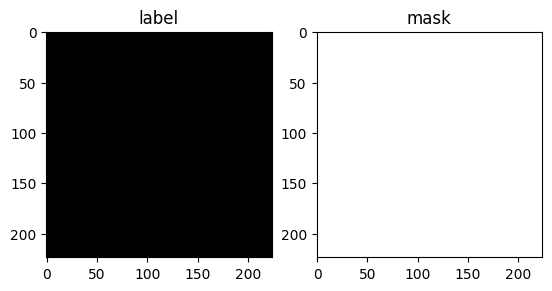

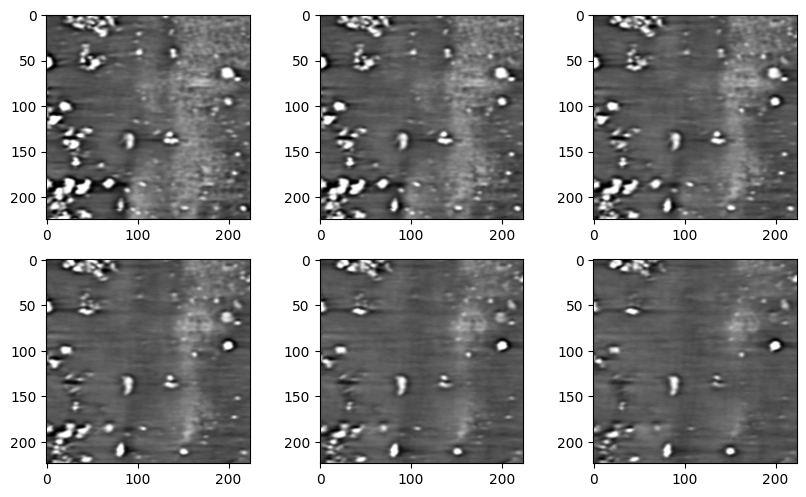

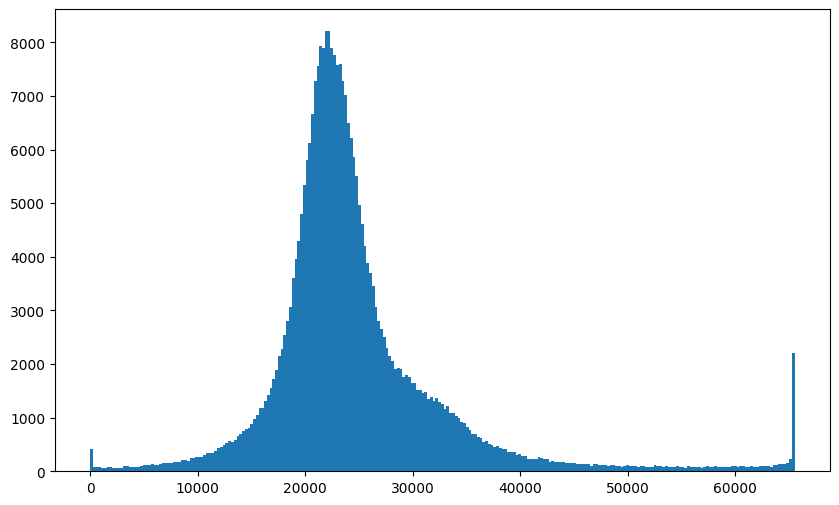

In [5]:
# confirmation

valid_fragment_i = 1
valid_split_i = 0

train_images, train_labels, train_masks, valid_images, valid_labels, valid_xyxys = get_train_valid_dataset(valid_fragment_i, valid_split_i, CFG, preprocess)

print(f"""
{len(train_images) = }
{train_images[0].shape = }
{train_labels[0].shape = }
{train_masks[0].shape = }

{len(valid_images) = }
{valid_images[0].shape = }
{valid_labels[0].shape = }
""")

id = random.randint(0, len(train_labels))
visualize_train_images(id, train_images, train_labels, train_masks)


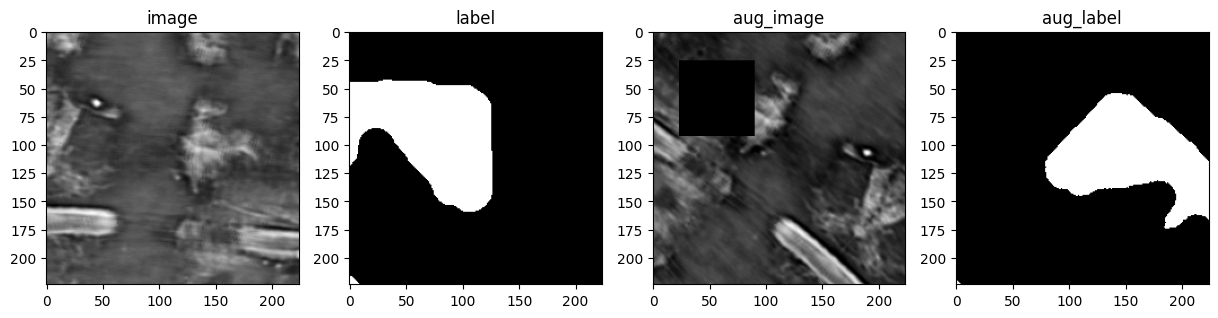

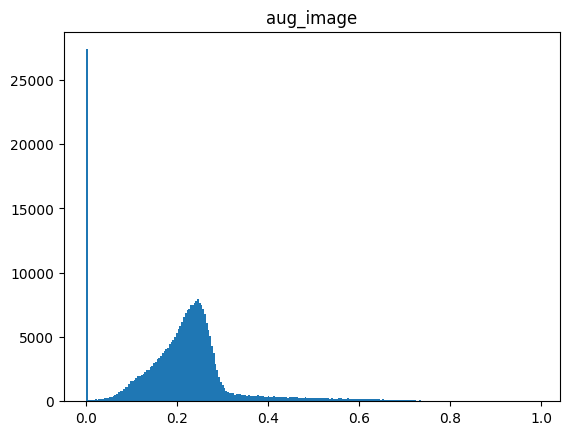

In [6]:
# confirmation
plot_dataset = CustomDataset(train_images, CFG, labels=train_labels)
visualize_dataset(plot_dataset, CFG)


## main

In [7]:
train_and_evaluate(preprocess, CFG)
!curl -X POST -H 'Authorization: Bearer '$LINE -F 'message=セルの実行が終わりました！' https://notify-api.line.me/api/notify

fold: 0


100%|██████████| 131/131 [00:08<00:00, 14.70it/s]


fbeta: 0.1166
Epoch 1 - avg_train_loss: 0.5394  avg_val_loss: 0.3904  avgScore: 0.1166  time: 94s
Epoch 1 - Save Best Loss: 0.3904  Best Score: 0.1166 Model



100%|██████████| 131/131 [00:08<00:00, 15.66it/s]


fbeta: 0.1273
Epoch 2 - avg_train_loss: 0.3727  avg_val_loss: 0.3447  avgScore: 0.1273  time: 89s
Epoch 2 - Save Best Loss: 0.3447  Best Score: 0.1273 Model



100%|██████████| 131/131 [00:08<00:00, 15.93it/s]


fbeta: 0.0019
Epoch 3 - avg_train_loss: 0.2875  avg_val_loss: 0.2515  avgScore: 0.0019  time: 89s



100%|██████████| 131/131 [00:08<00:00, 15.91it/s]


fbeta: 0.2962
Epoch 4 - avg_train_loss: 0.2564  avg_val_loss: 0.2444  avgScore: 0.2962  time: 89s
Epoch 4 - Save Best Loss: 0.2444  Best Score: 0.2962 Model



100%|██████████| 131/131 [00:08<00:00, 16.15it/s]


fbeta: 0.3088
Epoch 5 - avg_train_loss: 0.2429  avg_val_loss: 0.2408  avgScore: 0.3088  time: 89s
Epoch 5 - Save Best Loss: 0.2408  Best Score: 0.3088 Model



100%|██████████| 131/131 [00:08<00:00, 16.22it/s]


fbeta: 0.3217
Epoch 6 - avg_train_loss: 0.2334  avg_val_loss: 0.2799  avgScore: 0.3217  time: 90s
Epoch 6 - Save Best Loss: 0.2799  Best Score: 0.3217 Model



100%|██████████| 131/131 [00:08<00:00, 16.05it/s]


fbeta: 0.3470
Epoch 7 - avg_train_loss: 0.2236  avg_val_loss: 0.2699  avgScore: 0.3470  time: 89s
Epoch 7 - Save Best Loss: 0.2699  Best Score: 0.3470 Model



100%|██████████| 131/131 [00:08<00:00, 16.04it/s]


fbeta: 0.4015
Epoch 8 - avg_train_loss: 0.2130  avg_val_loss: 0.2778  avgScore: 0.4015  time: 90s
Epoch 8 - Save Best Loss: 0.2778  Best Score: 0.4015 Model



100%|██████████| 131/131 [00:08<00:00, 15.94it/s]


fbeta: 0.2846
Epoch 9 - avg_train_loss: 0.2024  avg_val_loss: 0.3127  avgScore: 0.2846  time: 89s



100%|██████████| 131/131 [00:08<00:00, 16.05it/s]


fbeta: 0.3837
Epoch 10 - avg_train_loss: 0.1917  avg_val_loss: 0.2900  avgScore: 0.3837  time: 89s



100%|██████████| 131/131 [00:08<00:00, 16.37it/s]


fbeta: 0.3797
Epoch 11 - avg_train_loss: 0.1804  avg_val_loss: 0.2839  avgScore: 0.3797  time: 89s



100%|██████████| 131/131 [00:08<00:00, 15.35it/s]


fbeta: 0.3580
Epoch 12 - avg_train_loss: 0.1672  avg_val_loss: 0.3202  avgScore: 0.3580  time: 92s



100%|██████████| 131/131 [00:08<00:00, 15.06it/s]


fbeta: 0.4078
Epoch 13 - avg_train_loss: 0.1569  avg_val_loss: 0.2988  avgScore: 0.4078  time: 93s
Epoch 13 - Save Best Loss: 0.2988  Best Score: 0.4078 Model



100%|██████████| 131/131 [00:08<00:00, 16.11it/s]


fbeta: 0.3702
Epoch 14 - avg_train_loss: 0.1462  avg_val_loss: 0.3273  avgScore: 0.3702  time: 91s



100%|██████████| 131/131 [00:08<00:00, 15.88it/s]


fbeta: 0.3674
Epoch 15 - avg_train_loss: 0.1392  avg_val_loss: 0.3330  avgScore: 0.3674  time: 90s



100%|██████████| 131/131 [00:08<00:00, 15.93it/s]


fbeta: 0.3536
Epoch 16 - avg_train_loss: 0.1326  avg_val_loss: 0.3449  avgScore: 0.3536  time: 89s



100%|██████████| 131/131 [00:08<00:00, 16.21it/s]


fbeta: 0.3640
Epoch 17 - avg_train_loss: 0.1254  avg_val_loss: 0.3523  avgScore: 0.3640  time: 89s



100%|██████████| 131/131 [00:08<00:00, 16.37it/s]


fbeta: 0.3592
Epoch 18 - avg_train_loss: 0.1194  avg_val_loss: 0.3556  avgScore: 0.3592  time: 88s



100%|██████████| 131/131 [00:08<00:00, 16.02it/s]


fbeta: 0.3651
Epoch 19 - avg_train_loss: 0.1158  avg_val_loss: 0.3703  avgScore: 0.3651  time: 89s



100%|██████████| 131/131 [00:07<00:00, 16.66it/s]


fbeta: 0.3629
Epoch 20 - avg_train_loss: 0.1124  avg_val_loss: 0.3639  avgScore: 0.3629  time: 89s

fold: 1


100%|██████████| 120/120 [00:07<00:00, 15.36it/s]


fbeta: 0.0054
Epoch 1 - avg_train_loss: 0.6252  avg_val_loss: 0.3547  avgScore: 0.0054  time: 91s
Epoch 1 - Save Best Loss: 0.3547  Best Score: 0.0054 Model



100%|██████████| 120/120 [00:07<00:00, 16.18it/s]


fbeta: 0.0001
Epoch 2 - avg_train_loss: 0.4305  avg_val_loss: 0.2856  avgScore: 0.0001  time: 89s



100%|██████████| 120/120 [00:07<00:00, 16.24it/s]


fbeta: 0.0134
Epoch 3 - avg_train_loss: 0.3139  avg_val_loss: 0.1679  avgScore: 0.0134  time: 89s
Epoch 3 - Save Best Loss: 0.1679  Best Score: 0.0134 Model



100%|██████████| 120/120 [00:07<00:00, 16.04it/s]


fbeta: 0.3380
Epoch 4 - avg_train_loss: 0.2793  avg_val_loss: 0.1724  avgScore: 0.3380  time: 90s
Epoch 4 - Save Best Loss: 0.1724  Best Score: 0.3380 Model



100%|██████████| 120/120 [00:07<00:00, 16.08it/s]


fbeta: 0.3079
Epoch 5 - avg_train_loss: 0.2659  avg_val_loss: 0.1450  avgScore: 0.3079  time: 91s



100%|██████████| 120/120 [00:07<00:00, 16.02it/s]


fbeta: 0.3324
Epoch 6 - avg_train_loss: 0.2543  avg_val_loss: 0.1492  avgScore: 0.3324  time: 91s



100%|██████████| 120/120 [00:07<00:00, 15.97it/s]


fbeta: 0.4174
Epoch 7 - avg_train_loss: 0.2459  avg_val_loss: 0.1473  avgScore: 0.4174  time: 91s
Epoch 7 - Save Best Loss: 0.1473  Best Score: 0.4174 Model



100%|██████████| 120/120 [00:07<00:00, 15.80it/s]


fbeta: 0.4397
Epoch 8 - avg_train_loss: 0.2362  avg_val_loss: 0.1584  avgScore: 0.4397  time: 91s
Epoch 8 - Save Best Loss: 0.1584  Best Score: 0.4397 Model



100%|██████████| 120/120 [00:07<00:00, 15.92it/s]


fbeta: 0.4572
Epoch 9 - avg_train_loss: 0.2267  avg_val_loss: 0.1461  avgScore: 0.4572  time: 90s
Epoch 9 - Save Best Loss: 0.1461  Best Score: 0.4572 Model



100%|██████████| 120/120 [00:07<00:00, 15.95it/s]


fbeta: 0.4738
Epoch 10 - avg_train_loss: 0.2159  avg_val_loss: 0.1572  avgScore: 0.4738  time: 91s
Epoch 10 - Save Best Loss: 0.1572  Best Score: 0.4738 Model



100%|██████████| 120/120 [00:07<00:00, 15.96it/s]


fbeta: 0.4648
Epoch 11 - avg_train_loss: 0.2050  avg_val_loss: 0.1588  avgScore: 0.4648  time: 90s



100%|██████████| 120/120 [00:07<00:00, 15.61it/s]


fbeta: 0.4742
Epoch 12 - avg_train_loss: 0.1952  avg_val_loss: 0.1562  avgScore: 0.4742  time: 92s
Epoch 12 - Save Best Loss: 0.1562  Best Score: 0.4742 Model



100%|██████████| 120/120 [00:07<00:00, 15.18it/s]


fbeta: 0.4393
Epoch 13 - avg_train_loss: 0.1817  avg_val_loss: 0.1603  avgScore: 0.4393  time: 94s



100%|██████████| 120/120 [00:07<00:00, 15.39it/s]


fbeta: 0.3895
Epoch 14 - avg_train_loss: 0.1721  avg_val_loss: 0.1750  avgScore: 0.3895  time: 94s



100%|██████████| 120/120 [00:07<00:00, 16.19it/s]


fbeta: 0.4110
Epoch 15 - avg_train_loss: 0.1647  avg_val_loss: 0.1814  avgScore: 0.4110  time: 94s



100%|██████████| 120/120 [00:07<00:00, 15.19it/s]


fbeta: 0.4256
Epoch 16 - avg_train_loss: 0.1553  avg_val_loss: 0.1769  avgScore: 0.4256  time: 92s



100%|██████████| 120/120 [00:07<00:00, 15.30it/s]


fbeta: 0.4333
Epoch 17 - avg_train_loss: 0.1493  avg_val_loss: 0.1712  avgScore: 0.4333  time: 93s



100%|██████████| 120/120 [00:07<00:00, 15.55it/s]


fbeta: 0.4495
Epoch 18 - avg_train_loss: 0.1445  avg_val_loss: 0.1711  avgScore: 0.4495  time: 94s



100%|██████████| 120/120 [00:07<00:00, 15.93it/s]


fbeta: 0.4341
Epoch 19 - avg_train_loss: 0.1379  avg_val_loss: 0.1784  avgScore: 0.4341  time: 91s



100%|██████████| 120/120 [00:07<00:00, 15.91it/s]


fbeta: 0.4598
Epoch 20 - avg_train_loss: 0.1354  avg_val_loss: 0.1797  avgScore: 0.4598  time: 90s

fold: 2


100%|██████████| 120/120 [00:07<00:00, 15.90it/s]


fbeta: 0.0364
Epoch 1 - avg_train_loss: 0.3394  avg_val_loss: 0.3939  avgScore: 0.0364  time: 90s
Epoch 1 - Save Best Loss: 0.3939  Best Score: 0.0364 Model



100%|██████████| 120/120 [00:07<00:00, 16.10it/s]


fbeta: 0.0754
Epoch 2 - avg_train_loss: 0.2731  avg_val_loss: 0.3702  avgScore: 0.0754  time: 90s
Epoch 2 - Save Best Loss: 0.3702  Best Score: 0.0754 Model



100%|██████████| 120/120 [00:07<00:00, 16.11it/s]


fbeta: 0.0028
Epoch 3 - avg_train_loss: 0.2446  avg_val_loss: 0.3537  avgScore: 0.0028  time: 89s



100%|██████████| 120/120 [00:07<00:00, 16.09it/s]


fbeta: 0.0762
Epoch 4 - avg_train_loss: 0.2277  avg_val_loss: 0.3568  avgScore: 0.0762  time: 89s
Epoch 4 - Save Best Loss: 0.3568  Best Score: 0.0762 Model



100%|██████████| 120/120 [00:07<00:00, 16.23it/s]


fbeta: 0.3440
Epoch 5 - avg_train_loss: 0.2195  avg_val_loss: 0.3468  avgScore: 0.3440  time: 90s
Epoch 5 - Save Best Loss: 0.3468  Best Score: 0.3440 Model



100%|██████████| 120/120 [00:07<00:00, 16.30it/s]


fbeta: 0.0976
Epoch 6 - avg_train_loss: 0.2121  avg_val_loss: 0.3627  avgScore: 0.0976  time: 89s



100%|██████████| 120/120 [00:07<00:00, 16.21it/s]


fbeta: 0.4402
Epoch 7 - avg_train_loss: 0.2033  avg_val_loss: 0.3817  avgScore: 0.4402  time: 89s
Epoch 7 - Save Best Loss: 0.3817  Best Score: 0.4402 Model



100%|██████████| 120/120 [00:07<00:00, 16.48it/s]


fbeta: 0.3448
Epoch 8 - avg_train_loss: 0.1941  avg_val_loss: 0.3910  avgScore: 0.3448  time: 89s



100%|██████████| 120/120 [00:07<00:00, 16.47it/s]


fbeta: 0.3837
Epoch 9 - avg_train_loss: 0.1864  avg_val_loss: 0.3926  avgScore: 0.3837  time: 87s



100%|██████████| 120/120 [00:07<00:00, 16.60it/s]


fbeta: 0.4490
Epoch 10 - avg_train_loss: 0.1790  avg_val_loss: 0.3780  avgScore: 0.4490  time: 87s
Epoch 10 - Save Best Loss: 0.3780  Best Score: 0.4490 Model



100%|██████████| 120/120 [00:07<00:00, 16.44it/s]


fbeta: 0.4056
Epoch 11 - avg_train_loss: 0.1674  avg_val_loss: 0.3822  avgScore: 0.4056  time: 88s



100%|██████████| 120/120 [00:07<00:00, 16.50it/s]


fbeta: 0.4117
Epoch 12 - avg_train_loss: 0.1609  avg_val_loss: 0.4051  avgScore: 0.4117  time: 88s



100%|██████████| 120/120 [00:07<00:00, 16.46it/s]


fbeta: 0.4373
Epoch 13 - avg_train_loss: 0.1492  avg_val_loss: 0.3998  avgScore: 0.4373  time: 88s



100%|██████████| 120/120 [00:07<00:00, 16.64it/s]


fbeta: 0.4546
Epoch 14 - avg_train_loss: 0.1396  avg_val_loss: 0.4020  avgScore: 0.4546  time: 87s
Epoch 14 - Save Best Loss: 0.4020  Best Score: 0.4546 Model



100%|██████████| 120/120 [00:07<00:00, 16.43it/s]


fbeta: 0.4386
Epoch 15 - avg_train_loss: 0.1321  avg_val_loss: 0.4658  avgScore: 0.4386  time: 87s



100%|██████████| 120/120 [00:07<00:00, 16.55it/s]


fbeta: 0.4519
Epoch 16 - avg_train_loss: 0.1261  avg_val_loss: 0.4539  avgScore: 0.4519  time: 88s



100%|██████████| 120/120 [00:07<00:00, 16.48it/s]


fbeta: 0.4670
Epoch 17 - avg_train_loss: 0.1182  avg_val_loss: 0.4609  avgScore: 0.4670  time: 87s
Epoch 17 - Save Best Loss: 0.4609  Best Score: 0.4670 Model



100%|██████████| 120/120 [00:07<00:00, 16.61it/s]


fbeta: 0.4398
Epoch 18 - avg_train_loss: 0.1161  avg_val_loss: 0.4872  avgScore: 0.4398  time: 88s



100%|██████████| 120/120 [00:07<00:00, 16.46it/s]


fbeta: 0.4658
Epoch 19 - avg_train_loss: 0.1086  avg_val_loss: 0.4703  avgScore: 0.4658  time: 87s



100%|██████████| 120/120 [00:07<00:00, 16.00it/s]


fbeta: 0.4058
Epoch 20 - avg_train_loss: 0.1076  avg_val_loss: 0.5237  avgScore: 0.4058  time: 90s

fold: 3


100%|██████████| 120/120 [00:07<00:00, 16.53it/s]


fbeta: 0.0430
Epoch 1 - avg_train_loss: 0.5354  avg_val_loss: 0.4460  avgScore: 0.0430  time: 89s
Epoch 1 - Save Best Loss: 0.4460  Best Score: 0.0430 Model



100%|██████████| 120/120 [00:07<00:00, 16.45it/s]


fbeta: 0.0574
Epoch 2 - avg_train_loss: 0.3594  avg_val_loss: 0.4086  avgScore: 0.0574  time: 89s
Epoch 2 - Save Best Loss: 0.4086  Best Score: 0.0574 Model



100%|██████████| 120/120 [00:07<00:00, 15.87it/s]


fbeta: 0.0059
Epoch 3 - avg_train_loss: 0.2721  avg_val_loss: 0.3462  avgScore: 0.0059  time: 90s



100%|██████████| 120/120 [00:07<00:00, 16.05it/s]


fbeta: 0.0029
Epoch 4 - avg_train_loss: 0.2389  avg_val_loss: 0.3368  avgScore: 0.0029  time: 91s



100%|██████████| 120/120 [00:07<00:00, 15.92it/s]


fbeta: 0.2309
Epoch 5 - avg_train_loss: 0.2268  avg_val_loss: 0.3238  avgScore: 0.2309  time: 91s
Epoch 5 - Save Best Loss: 0.3238  Best Score: 0.2309 Model



100%|██████████| 120/120 [00:07<00:00, 16.52it/s]


fbeta: 0.3996
Epoch 6 - avg_train_loss: 0.2182  avg_val_loss: 0.3196  avgScore: 0.3996  time: 90s
Epoch 6 - Save Best Loss: 0.3196  Best Score: 0.3996 Model



100%|██████████| 120/120 [00:07<00:00, 15.85it/s]


fbeta: 0.3895
Epoch 7 - avg_train_loss: 0.2103  avg_val_loss: 0.3596  avgScore: 0.3895  time: 91s



100%|██████████| 120/120 [00:07<00:00, 16.06it/s]


fbeta: 0.4339
Epoch 8 - avg_train_loss: 0.2038  avg_val_loss: 0.3446  avgScore: 0.4339  time: 92s
Epoch 8 - Save Best Loss: 0.3446  Best Score: 0.4339 Model



100%|██████████| 120/120 [00:07<00:00, 15.81it/s]


fbeta: 0.3528
Epoch 9 - avg_train_loss: 0.1948  avg_val_loss: 0.3652  avgScore: 0.3528  time: 91s



100%|██████████| 120/120 [00:07<00:00, 16.15it/s]


fbeta: 0.3812
Epoch 10 - avg_train_loss: 0.1862  avg_val_loss: 0.3535  avgScore: 0.3812  time: 90s



100%|██████████| 120/120 [00:07<00:00, 16.21it/s]


fbeta: 0.4841
Epoch 11 - avg_train_loss: 0.1759  avg_val_loss: 0.3623  avgScore: 0.4841  time: 90s
Epoch 11 - Save Best Loss: 0.3623  Best Score: 0.4841 Model



100%|██████████| 120/120 [00:07<00:00, 16.37it/s]


fbeta: 0.4558
Epoch 12 - avg_train_loss: 0.1661  avg_val_loss: 0.3793  avgScore: 0.4558  time: 89s



100%|██████████| 120/120 [00:07<00:00, 16.19it/s]


fbeta: 0.4750
Epoch 13 - avg_train_loss: 0.1569  avg_val_loss: 0.3823  avgScore: 0.4750  time: 89s



100%|██████████| 120/120 [00:07<00:00, 16.19it/s]


fbeta: 0.3828
Epoch 14 - avg_train_loss: 0.1507  avg_val_loss: 0.4065  avgScore: 0.3828  time: 90s



100%|██████████| 120/120 [00:07<00:00, 16.26it/s]


fbeta: 0.4273
Epoch 15 - avg_train_loss: 0.1406  avg_val_loss: 0.4033  avgScore: 0.4273  time: 90s



100%|██████████| 120/120 [00:07<00:00, 16.28it/s]


fbeta: 0.4545
Epoch 16 - avg_train_loss: 0.1342  avg_val_loss: 0.3935  avgScore: 0.4545  time: 90s



100%|██████████| 120/120 [00:07<00:00, 15.84it/s]


fbeta: 0.4613
Epoch 17 - avg_train_loss: 0.1263  avg_val_loss: 0.4173  avgScore: 0.4613  time: 92s



100%|██████████| 120/120 [00:07<00:00, 16.26it/s]


fbeta: 0.4305
Epoch 18 - avg_train_loss: 0.1239  avg_val_loss: 0.4236  avgScore: 0.4305  time: 90s



100%|██████████| 120/120 [00:07<00:00, 16.36it/s]


fbeta: 0.4060
Epoch 19 - avg_train_loss: 0.1172  avg_val_loss: 0.4489  avgScore: 0.4060  time: 90s



100%|██████████| 120/120 [00:07<00:00, 16.34it/s]


fbeta: 0.4418
Epoch 20 - avg_train_loss: 0.1159  avg_val_loss: 0.4340  avgScore: 0.4418  time: 89s

fold: 4


100%|██████████| 99/99 [00:06<00:00, 16.07it/s]


fbeta: 0.0054
Epoch 1 - avg_train_loss: 0.4482  avg_val_loss: 0.3492  avgScore: 0.0054  time: 92s
Epoch 1 - Save Best Loss: 0.3492  Best Score: 0.0054 Model



100%|██████████| 99/99 [00:06<00:00, 16.24it/s]


fbeta: 0.0272
Epoch 2 - avg_train_loss: 0.3261  avg_val_loss: 0.2925  avgScore: 0.0272  time: 91s
Epoch 2 - Save Best Loss: 0.2925  Best Score: 0.0272 Model



100%|██████████| 99/99 [00:06<00:00, 16.29it/s]


fbeta: 0.0000
Epoch 3 - avg_train_loss: 0.2813  avg_val_loss: 0.2336  avgScore: 0.0000  time: 92s



100%|██████████| 99/99 [00:06<00:00, 16.04it/s]


fbeta: 0.2992
Epoch 4 - avg_train_loss: 0.2583  avg_val_loss: 0.2354  avgScore: 0.2992  time: 91s
Epoch 4 - Save Best Loss: 0.2354  Best Score: 0.2992 Model



100%|██████████| 99/99 [00:06<00:00, 16.32it/s]


fbeta: 0.1266
Epoch 5 - avg_train_loss: 0.2446  avg_val_loss: 0.2357  avgScore: 0.1266  time: 92s



100%|██████████| 99/99 [00:06<00:00, 16.01it/s]


fbeta: 0.3403
Epoch 6 - avg_train_loss: 0.2380  avg_val_loss: 0.2313  avgScore: 0.3403  time: 92s
Epoch 6 - Save Best Loss: 0.2313  Best Score: 0.3403 Model



100%|██████████| 99/99 [00:06<00:00, 16.23it/s]


fbeta: 0.3503
Epoch 7 - avg_train_loss: 0.2277  avg_val_loss: 0.2435  avgScore: 0.3503  time: 93s
Epoch 7 - Save Best Loss: 0.2435  Best Score: 0.3503 Model



100%|██████████| 99/99 [00:06<00:00, 16.28it/s]


fbeta: 0.2957
Epoch 8 - avg_train_loss: 0.2179  avg_val_loss: 0.2378  avgScore: 0.2957  time: 92s



100%|██████████| 99/99 [00:06<00:00, 16.41it/s]


fbeta: 0.3325
Epoch 9 - avg_train_loss: 0.2060  avg_val_loss: 0.2410  avgScore: 0.3325  time: 90s



100%|██████████| 99/99 [00:06<00:00, 16.28it/s]


fbeta: 0.3116
Epoch 10 - avg_train_loss: 0.1978  avg_val_loss: 0.2495  avgScore: 0.3116  time: 90s



100%|██████████| 99/99 [00:06<00:00, 16.49it/s]


fbeta: 0.3429
Epoch 11 - avg_train_loss: 0.1858  avg_val_loss: 0.2544  avgScore: 0.3429  time: 91s



100%|██████████| 99/99 [00:06<00:00, 16.42it/s]


fbeta: 0.2847
Epoch 12 - avg_train_loss: 0.1763  avg_val_loss: 0.2634  avgScore: 0.2847  time: 90s



100%|██████████| 99/99 [00:06<00:00, 16.40it/s]


fbeta: 0.3370
Epoch 13 - avg_train_loss: 0.1664  avg_val_loss: 0.2657  avgScore: 0.3370  time: 90s



100%|██████████| 99/99 [00:06<00:00, 16.30it/s]


fbeta: 0.3046
Epoch 14 - avg_train_loss: 0.1561  avg_val_loss: 0.2731  avgScore: 0.3046  time: 91s



100%|██████████| 99/99 [00:06<00:00, 16.40it/s]


fbeta: 0.3189
Epoch 15 - avg_train_loss: 0.1474  avg_val_loss: 0.2677  avgScore: 0.3189  time: 91s



100%|██████████| 99/99 [00:06<00:00, 16.10it/s]


fbeta: 0.3024
Epoch 16 - avg_train_loss: 0.1402  avg_val_loss: 0.2820  avgScore: 0.3024  time: 93s



100%|██████████| 99/99 [00:06<00:00, 16.47it/s]


fbeta: 0.3006
Epoch 17 - avg_train_loss: 0.1333  avg_val_loss: 0.2900  avgScore: 0.3006  time: 91s



100%|██████████| 99/99 [00:06<00:00, 16.29it/s]


fbeta: 0.3243
Epoch 18 - avg_train_loss: 0.1276  avg_val_loss: 0.3100  avgScore: 0.3243  time: 92s



100%|██████████| 99/99 [00:06<00:00, 16.17it/s]


fbeta: 0.2998
Epoch 19 - avg_train_loss: 0.1234  avg_val_loss: 0.3243  avgScore: 0.2998  time: 92s



100%|██████████| 99/99 [00:06<00:00, 16.10it/s]


fbeta: 0.2910
Epoch 20 - avg_train_loss: 0.1214  avg_val_loss: 0.3165  avgScore: 0.2910  time: 92s

{"status":200,"message":"ok"}

In [8]:
gt_area_list, dice_list, valid_label_gt_list, label_pred_list = inference_evaluation(CFG)


fbeta: 0.4078
fbeta: 0.4742
fbeta: 0.4670
fbeta: 0.4841
fbeta: 0.3503


In [9]:
print(f"{dice_evaluation(gt_area_list, dice_list):.4f}")


0.4393


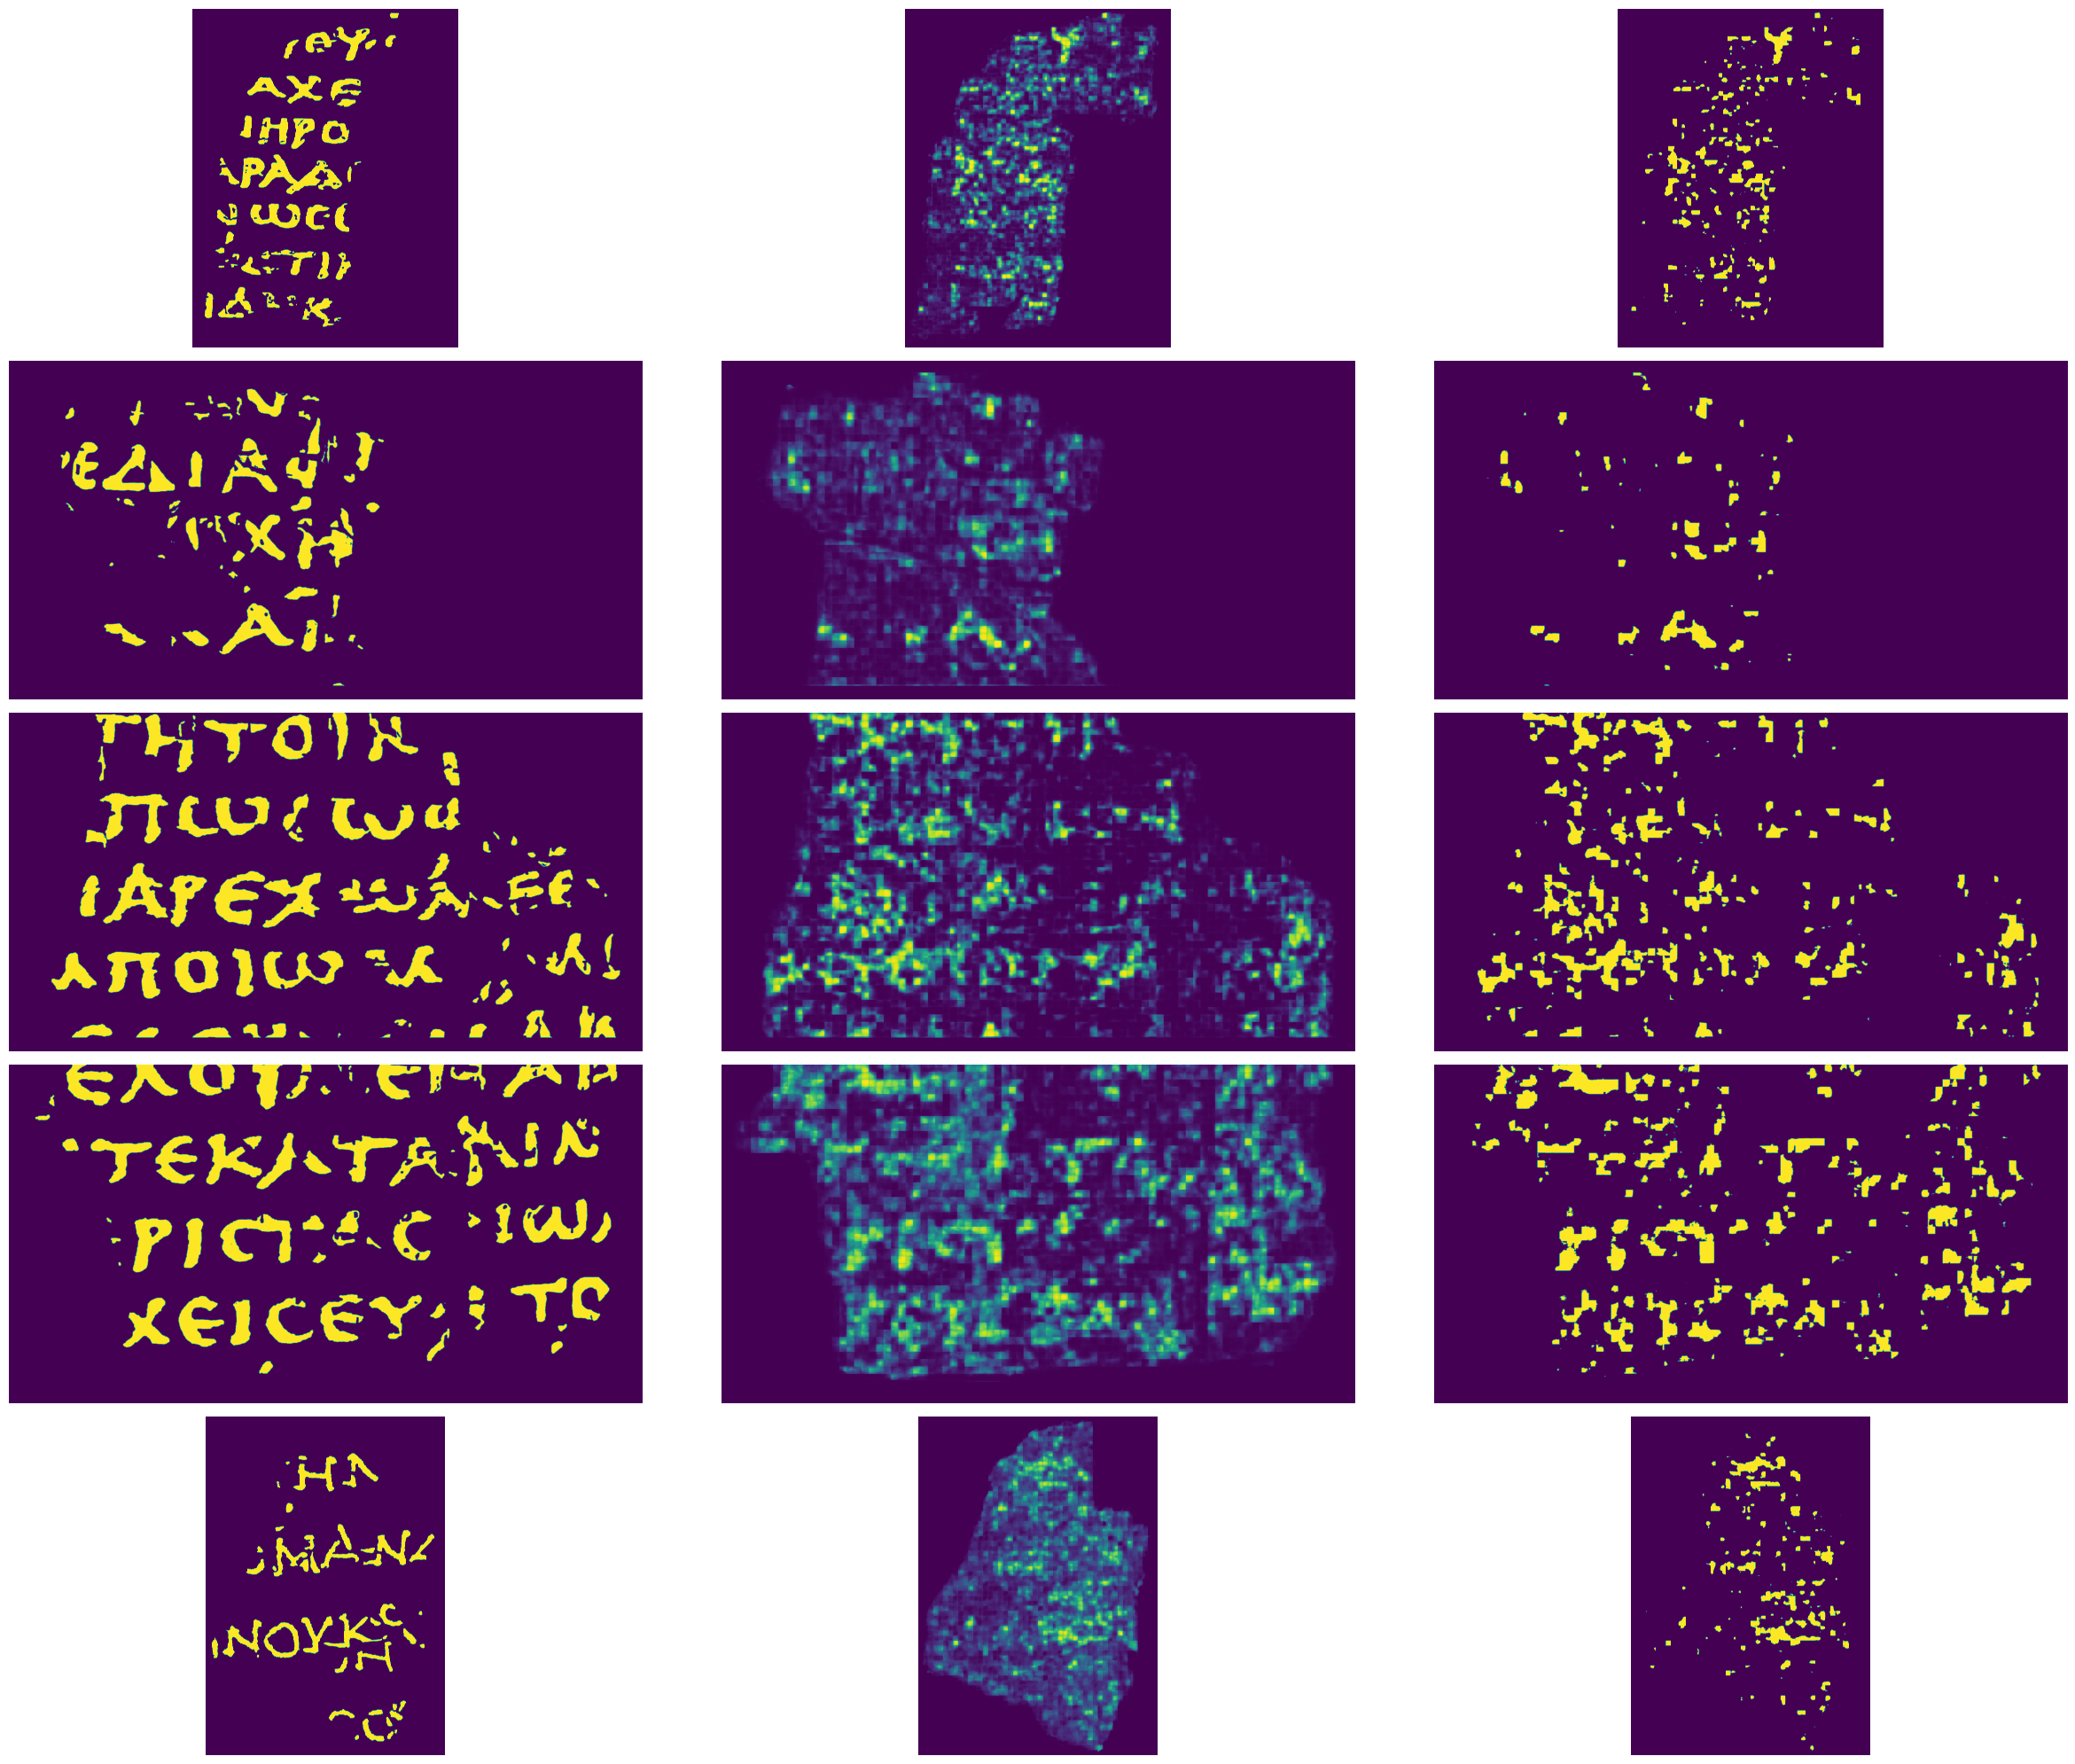

In [10]:
plot_inference(valid_label_gt_list, label_pred_list, CFG)